# 階層型クラスタリング

* クラスター数を最初に決めないクラスタリング手法
* 分類結果はデンドログラムにより表示することができる
* AgglomerativeClusteringは近いデータを集めて階層構造を生成していく

<a href="https://colab.research.google.com/github/ToumaTanaka/Data_Science/blob/main/Tabel_Data/Machine_Learning/Unsupervised_Learning/hierarchical_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#以下が階層クラスタリングに必要なコード
from sklearn.cluster import AgglomerativeClustering
#デンドログラムの表示に必要なコード
from scipy.cluster.hierarchy import dendrogram

import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import load_iris

### 可視化するための関数を定義

In [2]:
def plot_dendrogram(model, **kwargs):
   # Create linkage matrix and then plot the dendrogram

   # create the counts of samples under each node
   counts = np.zeros(model.children_.shape[0])
   n_samples = len(model.labels_)
   for i, merge in enumerate(model.children_):
      current_count = 0
      for child_idx in merge:
         if child_idx < n_samples:
            current_count += 1 # leaf node
         else:
            current_count += counts[child_idx - n_samples]
      counts[i] = current_count

   linkage_matrix = np.column_stack([model.children_, model.distances_,
counts]).astype(float)

   # Plot the corresponding dendrogram
   dendrogram(linkage_matrix, **kwargs)

### 学習データのロード

In [4]:
#アヤメのデータをロード
iris = load_iris()
#ラベルのないデータを用意
x = iris.data

### モデルの作成

In [11]:
#階層クラスタリングの設定
model = AgglomerativeClustering(affinity='euclidean',  #データポイント間の距離の計算の設定
                                linkage='ward',        #クラスター間の距離の計算方法の設定
                                distance_threshold=0,
                                n_clusters=None)     #生成するクラスターの数の設定、デンドログラムを表示するためにはここはNoneに設定する必要がある
                                
model = model.fit(x)

In [10]:
#分類結果の表示
print(model.labels_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 0 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


### デンドログラムの表示

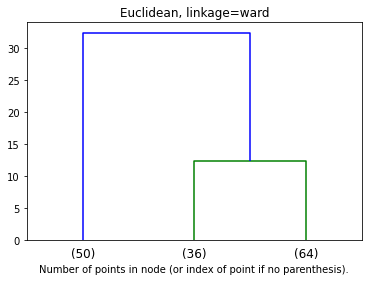

In [15]:
#デンドログラムの表示
plt.title('Euclidean, linkage=ward')
#pの値でクラス数を指定
plot_dendrogram(model, truncate_mode='lastp', p=3)　　
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()